https://colab.research.google.com/drive/1kmHqKTK_k6q7TQ6FmM6yoiSTHAvYVEbH

In [0]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

--2019-10-01 04:19:17--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  81.8MB/s    in 3.2s    

2019-10-01 04:19:20 (81.8 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [0]:
!unzip GTSRB_Final_Training_Images.zip

In [0]:
!ls

GTSRB  GTSRB_Final_Training_Images.zip	sample_data


In [0]:
root_dir = '/content/GTSRB/Final_Training/Images/'


In [0]:
from skimage import io
import os
import glob

In [0]:
all_img_paths = glob.glob(os.path.join(root_dir, '*/*.ppm'))
all_img_paths[:5]

['/content/GTSRB/Final_Training/Images/00041/00003_00019.ppm',
 '/content/GTSRB/Final_Training/Images/00041/00001_00010.ppm',
 '/content/GTSRB/Final_Training/Images/00041/00002_00012.ppm',
 '/content/GTSRB/Final_Training/Images/00041/00006_00004.ppm',
 '/content/GTSRB/Final_Training/Images/00041/00005_00004.ppm']

In [0]:
import numpy as np
from skimage import color, exposure, transform

NUM_CLASSES = 43
IMG_SIZE = 48

def preprocess_img(img):
#     # Histogram normalization in v channel
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
    img = color.hsv2rgb(hsv)
    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))


    return img

original


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


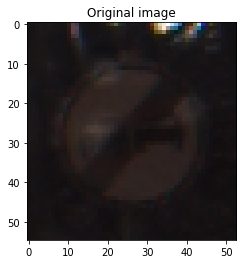

transformed


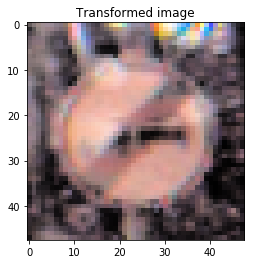

original


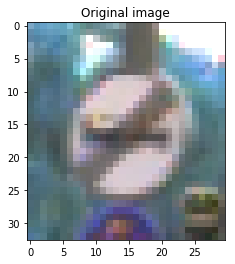

transformed


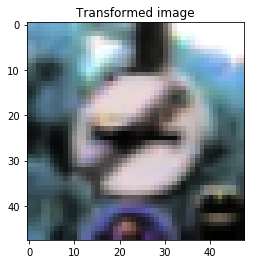

original


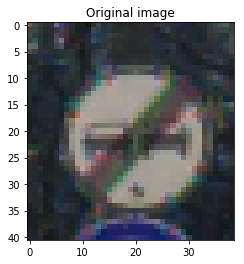

transformed


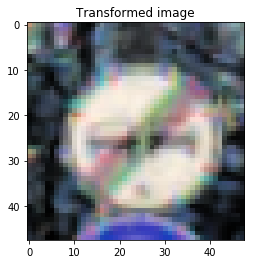

original


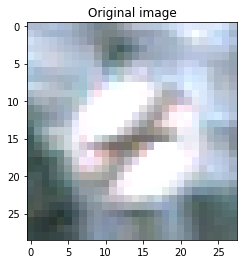

transformed


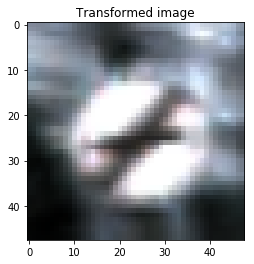

original


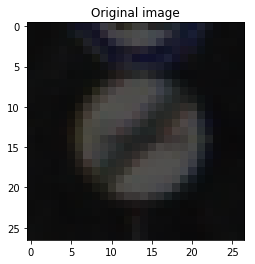

transformed


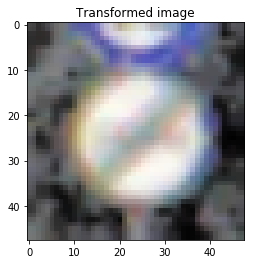

original


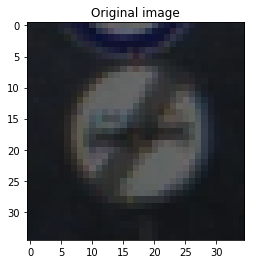

transformed


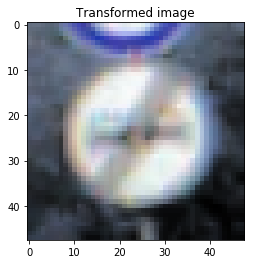

original


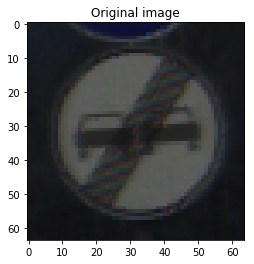

transformed


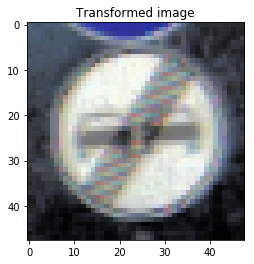

original


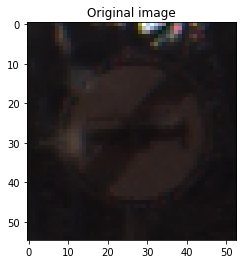

transformed


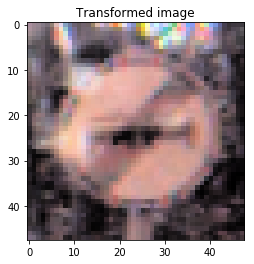

original


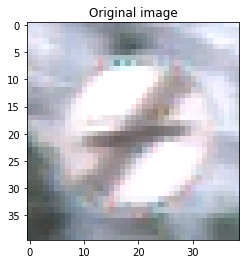

transformed


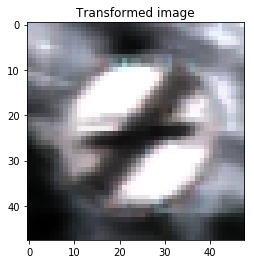

original


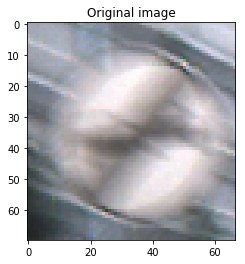

transformed


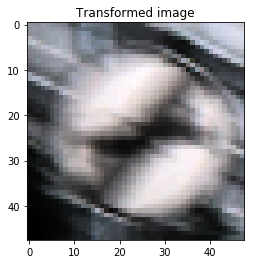

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
for img_path in all_img_paths[:10]:
    #print(count)
    img = cv2.imread(img_path)
    print('original')
    plt.imshow(img)
    plt.grid('off')
    plt.title('Original image')
    plt.show()
    img = preprocess_img(img)
    print('transformed')
    plt.imshow(img)
    plt.grid('off')    
    plt.title('Transformed image')
    plt.show()

In [0]:
def get_class(img_path):
    return int(img_path.split('/')[-2])
count = 0
imgs = []
labels = []
for img_path in all_img_paths:
    if(count%100==0):
      print(count)
    count+=1
    img = preprocess_img(io.imread(img_path))
#     img = (io.imread(img_path))
#     img = cv2.resize(img, (48,48))
    label = img_path.split('/')[-2]
    imgs.append(img)
    labels.append(label)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


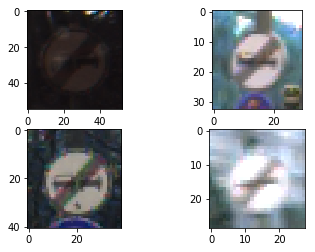

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(cv2.imread(all_img_paths[0]))
plt.grid('off')
plt.subplot(222)
plt.imshow(cv2.imread(all_img_paths[1]))
plt.grid('off')
plt.subplot(223)
plt.imshow(cv2.imread(all_img_paths[2]))
plt.grid('off')
plt.subplot(224)
plt.imshow(cv2.imread(all_img_paths[3]))
plt.grid('off')
plt.show()

In [0]:
img.shape

(48, 48, 3)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_SIZE, IMG_SIZE, 3),
                 activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same',
                 activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        36928     


In [0]:
from keras.utils import to_categorical

In [0]:
Y = to_categorical(labels, num_classes = NUM_CLASSES)

In [0]:
X = np.array(imgs)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42)

In [0]:
print(X_train.shape, y_train.shape)

(31367, 48, 48, 3) (31367, 43)


In [0]:
np.max(X_train)

1.0000000000000007

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=5,
          validation_data = (X_test, y_test)
          )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 31367 samples, validate on 7842 samples
Epoch 1/5
31367/31367 [==============================] - 35s 1ms/step - loss: 1.1360 - acc: 0.6711 - val_loss: 0.1248 - val_acc: 0.9634
Epoch 2/5
31367/31367 [==============================] - 28s 885us/step - loss: 0.1706 - acc: 0.9463 - val_loss: 0.0558 - val_acc: 0.9834
Epoch 3/5
31367/31367 [==============================] - 28s 888us/step - loss: 0.1138 - acc: 0.9640 - val_loss: 0.0361 - val_acc: 0.9901
Epoch 4/5
31367/31367 [==============================] - 28s 890us/step - loss: 0.0807 - acc: 0.9755 - val_loss: 0.0404 - val_acc: 0.9878
Epoch 5/5
31367/31367 [==============================] - 28s 888us/step - loss: 0.0738 - acc: 0.9777 - val_loss: 0.0316 - val_acc: 0.9901


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


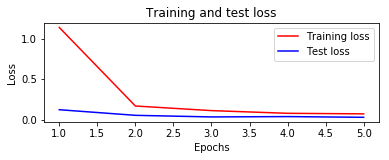

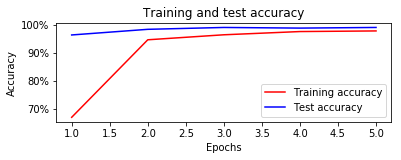

In [0]:
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()